<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# Ayarları belirliyoruz
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# İris veri setini yüklüyoruz
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Veri setinin ilk 5 satırını görüntülüyoruz
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
# Veriyi standardize ediyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# MDS ile boyut indirgeme
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# MDS bileşenlerini DataFrame'e dönüştürüyoruz
df_mds = pd.DataFrame(data=X_mds, columns=['MDS1', 'MDS2'])
df_mds['species'] = y


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


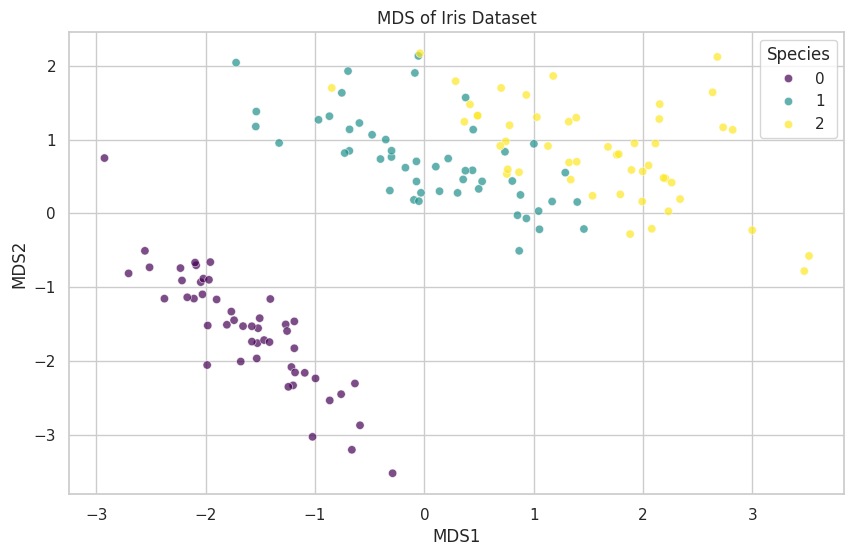

In [6]:
# MDS bileşenlerini görselleştiriyoruz
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MDS1', y='MDS2', hue='species', data=df_mds, palette='viridis', alpha=0.7)
plt.title('MDS of Iris Dataset')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Species')
plt.show()
